In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [63]:
# Step 1: Generate Sample Price Data
# Replace this with your own dataset
dates = pd.date_range("2024-01-01", "2024-11-24")
prices = np.sin(np.linspace(0, 6.28, len(dates))) * 50 + 150  # Simulated price data
data = pd.DataFrame({"Date": dates, "Price": prices})

In [64]:
# Step 2: Preprocess Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data["Price"].values.reshape(-1, 1))
data

,Date,Price
0,2024-01-01,150.000000
1,2024-01-02,150.957259
2,2024-01-03,151.914166
3,2024-01-04,152.870372
4,2024-01-05,153.825526
...,...,...
324,2024-11-20,146.015695
325,2024-11-21,146.970640
326,2024-11-22,147.926695
327,2024-11-23,148.883510


In [65]:
# Define the sequence length (how many days to look back)
sequence_length = 30

In [66]:
# Prepare input (X) and output (Y) for training
X, Y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    Y.append(scaled_data[i, 0])
X, Y = np.array(X), np.array(Y)

In [67]:
# Reshape input to [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [68]:
# Step 3: Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer

C:\Users\ThinkPad\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [70]:
# Step 4: Train the Model
model.fit(X, Y, epochs=20, batch_size=32)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1826
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0350
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0186
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0079
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0049
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0026
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0024
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0023
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0018
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0016
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0014
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0012
Epoc

In [71]:
# Step 5: Make Predictions
# Use the last `sequence_length` data points to predict the next price
test_input = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)
predicted_price_scaled = model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


In [72]:
# Convert the scaled prediction back to the original scale
predicted_price = scaler.inverse_transform(predicted_price_scaled)

In [73]:
print(f"Predicted Price: {predicted_price[0][0]:.2f}")

Predicted Price: 150.57


In [74]:
# Step 6: Plot the Results
import matplotlib.pyplot as plt

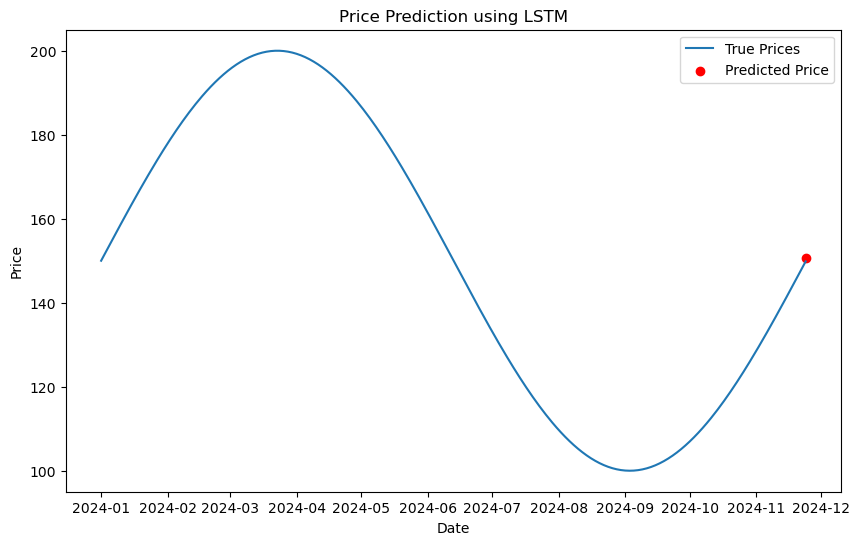

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(data["Date"], data["Price"], label="True Prices")
plt.scatter(data["Date"].iloc[-1], predicted_price, color='red', label="Predicted Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price Prediction using LSTM")
plt.legend()
plt.show()